# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ответ:***

$w_{new} = w_{old} - \alpha\nabla_{w} Q(w_{old})$

$\nabla_{w}Q(w_{old}) =\frac{2}{n}X^T(Xw_{old} - y) + \frac{2}{C}Iw_{old}$

$w^{i}_{new} = w^{i}_{old} - \alpha \left[\frac{2}{n}\sum_j (\langle\,x_{j},w_{old}\rangle - y_j)x^{i}_{j} + \frac{2}{C}w^{i}_{old}\right]$


$w^{0}_{new} = w^{0}_{old} - \alpha \left[\frac{2}{n}\sum_j (\langle\,x_{j},w_{old}\rangle - y_j)x^{0}_{j}\right]$

В регуляризационный член при суммировании  $𝑤_{0}$ не входит.
Градиент определяет направление наибольшего роста функции ошибки. Разница $\left(\langle\,x_{j},w_{old}\rangle - y_j\right)$ - это ошибка нашего предсказания на $j$-ом примере.При изменении $𝑤_{i}$ на 1 согласно знаку градиента - ошибка вырастет на  𝑗 -ом примере приблизительно на $\left(\langle\,x_{j},w_{old}\rangle - y_{j}\right)x^{i}_{j}$. В случае изменения $𝑤_{i}$ в направлении антиградиента, функция ошибки будет уменьшаться.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ответ:***

$w_{new} = w_{old} - \alpha\nabla_{w} Q(w_{old})$

$\nabla_{w}Q(w_{old}) = \frac{1}{n}X^T(\sigma\left(\langle\,X, w_{old}\rangle) - y\right) + \frac{2}{C}Iw_{old}$

$w^{i}_{new} = w^{i}_{old} - \alpha (\frac{1}{n}\sum_{j=1}^n\left(\sigma\left(\langle\,x_{j},w_{old}\rangle\right)-y_{j}\right)\,x^{i}_{j} + \frac{2}{C}w^{i}_{old})$

$w^{0}_{new} = w^{0}_{old} - \alpha (\frac{1}{n}\sum_{j=1}^n\left(\sigma\left(\langle\,x_{j},w_{old}\rangle\right)-y_{j}\right)\,x^{0}_{j})$

В регуляризационный член при суммировании  $𝑤_{0}$ не входит.
Градиент определяет направление наибольшего роста функции ошибки. Разница $\left(\sigma\left(\langle\,x_{j},w_{old}\rangle\right)-y_{j}\right)$ - это ошибка нашего предсказания на $j$-ом примере.При изменении $𝑤_{i}$ на 1 согласно знаку градиента - ошибка вырастет примерно на $\left(\sigma\left(\langle\,x,w_{old}\rangle\right)-y^{(i)}\right)\,x^{i}_{j}$. В случае изменения $𝑤_{i}$ в направлении антиградиента, функция ошибки будет уменьшаться.
Градиент для логистической регрессии отличается от градиента линейной регрессии только тем, что скалярное произведение (предсказание в лин. рег.) мы подаем на вход $\sigma$.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ответ:***

***1***

Гессиан равен $(2X^TX)$. Рассмотрим систему векторов, состоящую из строк матрицы $X$. По условию матрица $X$ имеет полный ранг, отсюда следует, что рассматриваемые нами векторы линейно независимы. В том числе независимы и подсистемы векторов нашей системы.
$(X^TX)$ - очевидно, это матрица Грамма нашей системы векторов. При этом подматрицы $(X^TX)$, соответсвующие главным минорам, также являются матрицами Грамма.
Известно, что определитель матрицы Грамма всегда $>=0$. При этом равенство имеет место тогда и только тогда, когда векторы линейно зависимы.
То есть в нашем случае все главные миноры $(X^TX)$ строго положительны. Отсюда следует, что $(X^TX)$ положительно определенная матрица. Следовательно, точное решение является точкой минимума.

***2***

$Q(w) = \frac{1}{N}(Xw-y)^T(Xw-y)+\frac{1}{C}\sum w^2_i$

$\nabla_{w} Q = [2X^TXw-2X^Ty]+\frac{2}{C}Iw = 0$

$w = (X^TX + \frac{1}{C}I)^{-1}X^TY $

В случае если $(X^TX)$ вырожденная, то матрица, очевидно, $(X^TX + \frac{1}{C}I)$ является невырожденной. И тогда точное решение можно вычислить по формуле выше. Таким образом L2 регуляризация позволяет заменить вырожденную матрицу $(X^TX)$ на близкую к ней невырожденную $(X^TX + \frac{1}{C}I)$ и вычислить точное решение.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ответ:***

Подставив  $p(y_i = 0 | x_i) = 1 - p(y_i = 1 | x_i)$ и возьмем производную от E по a :

$\frac{1- p(y_i = 1 | x_i)}{1-a} - \frac{p(y_i = 1 | x_i)}{a}$ 

Вторая производная:
$\frac{1 - p(y_i = 1 | x_i)}{(1-a)^2} + \frac{p(y_i = 1 | x_i)}{a^2} > 0$ при $a \in (0, 1)$, а первая производная обращается в 0 при $a= p(y_i = 1 | x_i)$.
Отсюда следует, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ответ:***
Нет, не нужно. В регуляризационный член при суммировании обычно не включают $w_0$, поскольку он отвечает за общий сдвиг значений функции, который может быть произвольным, а L1/L2 регуляризация стремится минимизировать значения $w_i$.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [122]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [18]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    indices = np.arange(X.shape[0])
    if(shuffle):
        np.random.shuffle(indices)
    y = y.reshape(-1, 1)
    X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
    train_size = X.shape[0]
    num_iters = train_size // batch_size
    if(num_iters > 0):
        for i in range(num_iters):
            start = i * batch_size
            cnt_items = batch_size
            if(i == num_iters - 1):
                cnt_items = train_size - i * batch_size
            X_batch = X[indices[start:start + cnt_items]]
            y_batch = y[indices[start:start + cnt_items]]
            yield (X_batch, y_batch)
    else:
        yield (X[indices], y[indices])
        
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [19]:
#!pip install pycodestyle
#!pip install pycodestyle_magic
#%load_ext pycodestyle_magic

In [20]:
from scipy.special import expit
from sklearn.base import BaseEstimator, ClassifierMixin

In [24]:
#%%pycodestyle  
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    result = expit(x)
    result[result > 0.9999] = 0.9999
    result[result < 0.0001] = 0.0001
    return result


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            diff = (np.dot(X_batch, self.weights) - y_batch)
            diff[diff > 35] = 35
            diff[diff < -35] = -35
            loss =  (1 / X_batch.shape[0]) * np.sum(diff ** 2) / 2
            w_1 = self.weights[1:]
            r_w = w_1 ** 2
            r = self.C * np.sum(r_w) / 2
            loss = loss + r
        else:
            preds = sigmoid(X_batch.dot(self.weights))
            loss = self.binary_cross_entropy(y_batch, preds, False)
            r = self.C * np.sum(np.power(self.weights[1:], 2)) / 2
            loss = loss + r
        return loss

    def binary_cross_entropy(self, target, pred, limit=False):
        results = (-1)*(np.dot(target.T, np.log(pred)) + np.dot((1 - target).T, np.log(1 - pred)))
        results = results * (1 / target.shape[0])
        results = results.ravel()
        if(limit):
            results[results > 35] = 35
        return np.sum(results)

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            preds = X_batch.dot(self.weights)
            diff = preds - y_batch
            s = (X_batch.T).dot(diff) * (1 / X_batch.shape[0])
            r = self.C * np.vstack((np.array([[0]]), self.weights[1:]))
            loss_grad = s + r
        else:
            preds = sigmoid(X_batch.dot(self.weights))
            diff = preds - y_batch
            s = (X_batch.T).dot(diff) * (1 / X_batch.shape[0])
            r = self.C * np.vstack((np.array([[0]]), self.weights[1:]))
            loss_grad = s + r
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.random.uniform(-1e-03, +1e-03, (X.shape[1] + 1, 1))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator()
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X, th=0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            logit = X.dot(self.weights)
            y_hat = np.where(logit < th, 0, 1)
        else:
            logit = X.dot(self.weights)
            output = sigmoid(logit)
            y_hat = np.where(output < th, 0, 1)
        return y_hat.astype(int)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [25]:
def plot_decision_boundary(clf):
    w = clf.weights.ravel()
    th = 0
    if clf.model_type =='lin_reg':
        th = 0.5
    x_values = np.linspace(-4., 8.)
    y_values = -(w[0] + (w[1] * x_values) - th) / w[2]
    return (x_values, y_values)

In [26]:
import functools

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

batch_generator_func = functools.partial(batch_generator, X, y, shuffle=True, batch_size=1000)

clf_lin_reg = MySGDClassifier(batch_generator=batch_generator_func, C=1, alpha=0.01, max_epoch=1000, model_type='lin_reg')
clf_lin_reg.fit(X, y)
(x_values_lin_reg, y_values_lin_reg) = plot_decision_boundary(clf_lin_reg)

clf_log_reg = MySGDClassifier(batch_generator=batch_generator_func, C=0.01, alpha=0.1, max_epoch=1000, model_type='log_reg')
clf_log_reg.fit(X, y)
(x_values_log_reg, y_values_log_reg) = plot_decision_boundary(clf_log_reg)

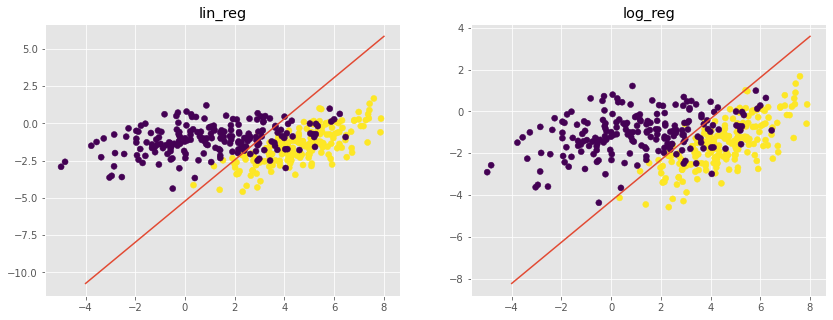

In [27]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(121)
ax1.set_title("lin_reg")
plt.plot(x_values_lin_reg, y_values_lin_reg)
plt.scatter(X[:,0], X[:,1], c=y)

ax2 = fig.add_subplot(122)
ax2.set_title("log_reg")
plt.plot(x_values_log_reg, y_values_log_reg)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [29]:
from sklearn.datasets import make_classification

In [30]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [31]:
def plot_mean_loss(clf, N=50):
    mean_loss = []
    mean_x = []
    errors_log = np.array(clf.errors_log['loss'])
    steps = len(clf.errors_log['loss']) // N

    for i in range(steps):
        start = i * N
        end = start + N
        mean_loss.append(np.mean(errors_log[start:end]))
        mean_x.append(i)

    return (mean_x, mean_loss)

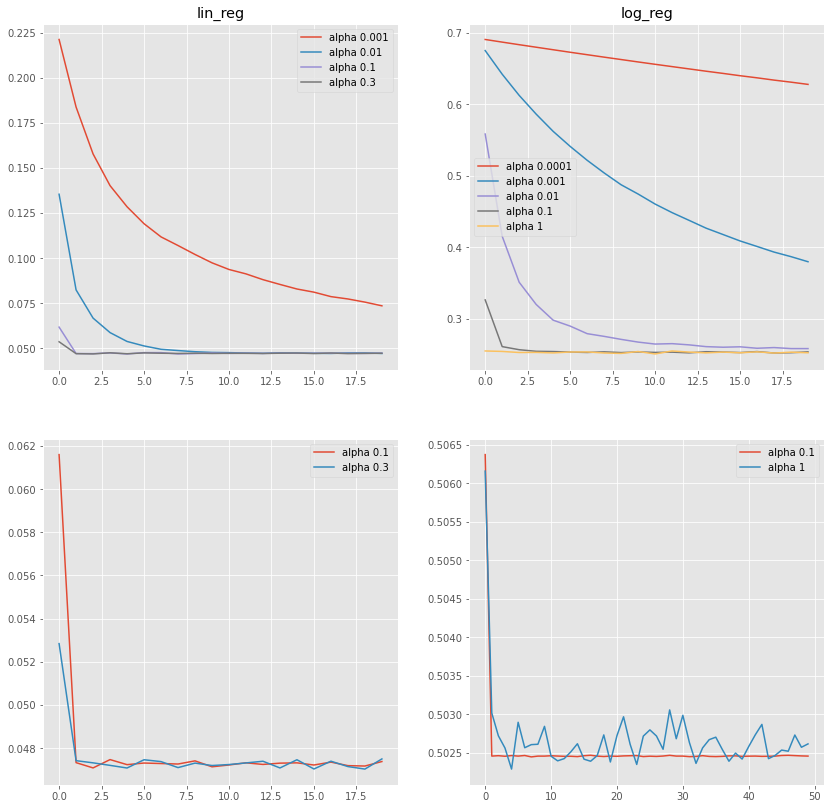

In [32]:
batch_generator_func = functools.partial(batch_generator, X, y, shuffle=True, batch_size=1000)

N = 50
    
fig = plt.figure(figsize= (14, 14))
ax1 = fig.add_subplot(221)
ax1.set_title("lin_reg")

for alpha in [1e-03, 1e-02, 1e-01, 0.3]:
    model_type='lin_reg'
    clf = MySGDClassifier(batch_generator=batch_generator_func, C=1, max_epoch=10, alpha=alpha,model_type=model_type)
    clf.fit(X,y)
    (mean_x, mean_errors) = plot_mean_loss(clf, N)
    ax1.plot(mean_x, mean_errors, label='alpha {}'.format(alpha))
ax1.legend()

ax3 = fig.add_subplot(223)
for alpha in [1e-01, 0.3]:
    model_type='lin_reg'
    clf = MySGDClassifier(batch_generator=batch_generator_func, C=1, max_epoch=10, alpha=alpha,model_type=model_type)
    clf.fit(X,y)
    (mean_x, mean_errors) = plot_mean_loss(clf, N)
    ax3.plot(mean_x, mean_errors, label='alpha {}'.format(alpha))
ax3.legend()

ax2 = fig.add_subplot(222)
ax2.set_title("log_reg")
for alpha in [1e-04, 1e-03, 1e-02, 1e-01, 1]:
    model_type='log_reg'
    clf = MySGDClassifier(batch_generator=batch_generator_func, C=0.1, max_epoch=10, alpha=alpha,model_type=model_type)
    clf.fit(X,y)
    (mean_x, mean_errors) = plot_mean_loss(clf, N)
    ax2.plot(mean_x, mean_errors, label='alpha {}'.format(alpha))
ax2.legend()

N = 100
ax4 = fig.add_subplot(224)
for alpha in [1e-01, 1]:
    model_type='log_reg'
    clf = MySGDClassifier(batch_generator=batch_generator_func, C=1, max_epoch=50, alpha=alpha,model_type=model_type)
    clf.fit(X,y)
    (mean_x, mean_errors) = plot_mean_loss(clf, N)
    ax4.plot(mean_x, mean_errors, label='alpha {}'.format(alpha))
ax4.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

## Ответ:
при batch_size=1000:
для lin_reg метод быстрее сходится при alpha = 1e-01. Для log_reg при alpha = 1e-01.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [33]:
## Your Code Here
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

batch_generator_func = functools.partial(batch_generator, X, y, shuffle=True, batch_size=1000)
lin_reg_weights = []
log_reg_weights = []
log_reg_weights_0 = []
lin_reg_weights_0 = []
x_values  = np.logspace(3,-3,10)
for C in x_values:
    clf = MySGDClassifier(batch_generator=batch_generator_func, C=C, max_epoch=10, alpha=0.001,model_type='lin_reg')
    clf.fit(X, y) 
    lin_reg_weights.append(np.abs(clf.weights).mean())
    lin_reg_weights_0.append(clf.weights[0])
    
    clf =MySGDClassifier(batch_generator=batch_generator_func, C=C, max_epoch=10, alpha=0.001,model_type='log_reg')
    clf.fit(X, y) 
    log_reg_weights.append(np.abs(clf.weights).mean())
    log_reg_weights_0.append(clf.weights[0])

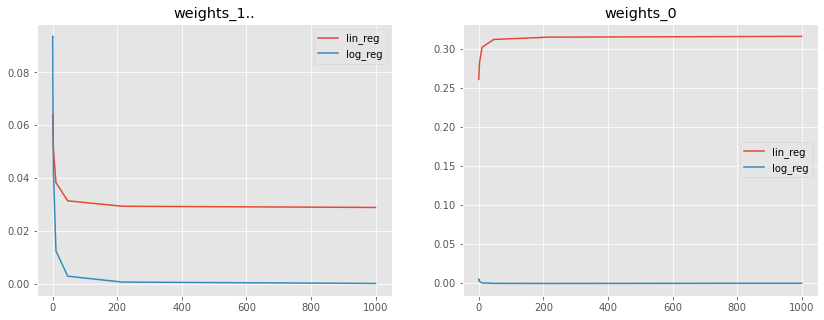

In [34]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(121)
ax1.set_title("weights_1..")
plt.plot(x_values, lin_reg_weights, label='lin_reg')
plt.plot(x_values, log_reg_weights, label='log_reg')
plt.legend()

ax2 = fig.add_subplot(122)
ax2.set_title("weights_0")
plt.plot(x_values, lin_reg_weights_0, label='lin_reg')
plt.plot(x_values, log_reg_weights_0, label='log_reg')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

## Ответ:
видно, что при увеличении С веса уменьшаются, кроме смещения $w_0$.
В теоритической части (выше) умножение 1/C, мне привычнее С * R(w).

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [40]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='UTF-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [41]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [42]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [43]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [45]:
X_train.shape

(11690, 15)

In [46]:
from sklearn.metrics import accuracy_score

batch_generator_func = functools.partial(batch_generator, X_train, y_train, shuffle=True, batch_size=1000)
clf = MySGDClassifier(batch_generator=batch_generator_func,  C=0.01, alpha=0.1, max_epoch=1000, model_type='log_reg')
clf.fit(X_train, y_train)

preds = clf.predict(np.hstack((np.ones(X_train.shape[0])[:, np.newaxis], X_train)))
accuracy_score(y_train, preds)

0.7852865697177075

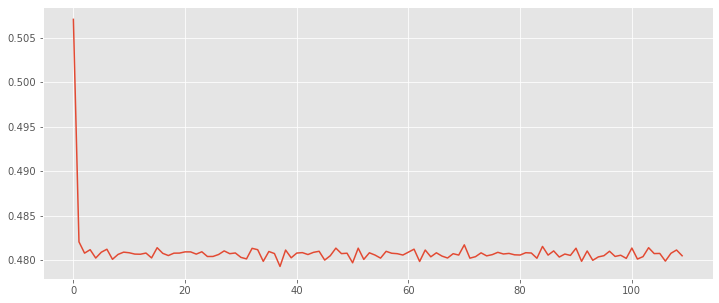

In [47]:
(mean_x, mean_loss) = plot_mean_loss(clf, 100)
plt.plot(mean_x, mean_loss)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [49]:
splits = []
#1-ый фолд
test_idxs = groups_train <= 43
train_idxs = ~test_idxs
splits.append((train_idxs, test_idxs))
#2-ой фолд
test_idxs = (groups_train > 43) & (groups_train <= 86)
train_idxs = ~test_idxs
splits.append((train_idxs, test_idxs))
#3-ый фолд
test_idxs = groups_train > 86
train_idxs = ~test_idxs
splits.append((train_idxs, test_idxs))

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [50]:
def accuracy(clf, X, y_true, th=0.5):
    X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
    preds = clf.predict(X, th).ravel()
    return accuracy_score(y_true, preds)

def log_loss(clf, X, y_true):
    X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
    preds = sigmoid(X.dot(clf.weights))
    l = clf.binary_cross_entropy(y_true, preds)
    r = clf.C * np.sum(np.power(clf.weights[1:], 2)) / 2
    return (l + r)

def lin_loss(clf, X, y_true):
    X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
    loss = np.mean(np.sum((np.dot(X, clf.weights) - y_true) ** 2)) / 2
    r = clf.C * np.sum(np.power(clf.weights[1:], 2)) / 2
    loss = loss + r
    return loss

In [51]:
lin_scores = []
for alpha in [1e-03, 1e-02]:
    for C in [0.1, 0, 10, 100]:
        for max_epoch in range(1, 11):
            tmp_lin_scores = []
            tmp_lin_acc = []
            for train, test in splits:
                batch_generator_func = functools.partial(batch_generator, X_train[train], y_train[train], shuffle=True, batch_size=100)
                clf = MySGDClassifier(batch_generator=batch_generator_func, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg', C=C)
                clf.fit(X_train[train], y_train[train])
                tmp_lin_acc.append(accuracy(clf, X_train[test], y_train[test], th=0.5))
                tmp_lin_scores.append(lin_loss(clf, X_train[test], y_train[test]))
            lin_scores.append({'C': C, 'alpha':alpha, 'max_epoch' : max_epoch, 'loss' : np.mean(tmp_lin_scores), 'acc' : np.mean(tmp_lin_acc)})

In [52]:
lin_scores.sort(key=lambda x: x['loss'])

lin_best = lin_scores[0]
lin_best

# lin_scores.sort(key=lambda x: x['acc'], reverse=True)

# lin_best_acc = lin_scores[0]
# lin_best_acc['loss'] - lin_best_loss['loss'], lin_best_acc['acc'], lin_best_loss['acc']

{'C': 100,
 'alpha': 0.01,
 'max_epoch': 8,
 'loss': 1560214.4869309047,
 'acc': 0.7124988325078756}

In [53]:
batch_generator_func = functools.partial(batch_generator, X_train, y_train, shuffle=True, batch_size=1000)
clf = MySGDClassifier(batch_generator=batch_generator_func, alpha=lin_best['alpha'], max_epoch=lin_best['max_epoch'], model_type='lin_reg', C = lin_best['C'])
clf.fit(X_train, y_train)
accuracy(clf, X_train, y_train, th=0.3)

0.7127459366980325

In [55]:
from sklearn.metrics import f1_score
lin_f1_scores = []
for th in np.arange(0, 0.7, 0.01):
    tmp_lin_f1_scores = []
    for train, test in splits:
        batch_generator_func = functools.partial(batch_generator, X_train[train], y_train[train], shuffle=True, batch_size=1000)
        clf = MySGDClassifier(batch_generator_func, alpha=lin_best['alpha'], max_epoch=lin_best['max_epoch'], model_type='lin_reg', C = lin_best['C'])
        clf.fit(X_train[train], y_train[train])
        preds = clf.predict(np.hstack((np.ones(X_train[test].shape[0])[:, np.newaxis], X_train[test])), th)
        tmp_lin_f1_scores.append(f1_score(preds,y_train[test]))
    lin_f1_scores.append({'th':th, 'f1':np.mean(tmp_lin_f1_scores)})

In [56]:
lin_f1_scores.sort(key=lambda x: x['f1'], reverse=True)
lin_best['th'] = lin_f1_scores[0]['th']
lin_best['f1'] = lin_f1_scores[0]['f1']

In [58]:
log_scores = []
for alpha in [1e-03, 1e-02]:
    for C in [1e-01, 1, 10, 100]:
        for max_epoch in range(1, 11):
            tmp_log_scores = []
            tmp_log_acc = []
            for train, test in splits:
                batch_generator_func = functools.partial(batch_generator, X_train[train], y_train[train], shuffle=True, batch_size=100)
                clf = MySGDClassifier(batch_generator=batch_generator_func, alpha=alpha, max_epoch=max_epoch, model_type='log_reg', C=C)
                clf.fit(X_train[train], y_train[train])
                tmp_log_scores.append(log_loss(clf, X_train[test], y_train[test]))
                tmp_log_acc.append(accuracy(clf, X_train[test], y_train[test], th=0.5))
            log_scores.append({'C': C, 'alpha':alpha, 'max_epoch' : max_epoch, 'loss' : np.mean(tmp_log_scores), 'acc' : np.mean(tmp_log_acc)})

In [59]:
log_scores.sort(key=lambda x: x['loss'])

log_best = log_scores[0]
log_best

{'C': 0.1,
 'alpha': 0.01,
 'max_epoch': 10,
 'loss': 0.49295591059283733,
 'acc': 0.7886847234407769}

In [60]:
batch_generator_func = functools.partial(batch_generator, X_train, y_train, shuffle=True, batch_size=1000)
clf = MySGDClassifier(batch_generator=batch_generator_func, alpha=log_best['alpha'], max_epoch=log_best['max_epoch'], model_type='log_reg', C = log_best['C'])
clf.fit(X_train, y_train)
accuracy(clf, X_train, y_train, th=0.5)

0.7707442258340462

In [61]:
from sklearn.metrics import f1_score
log_f1_scores = []
for th in np.arange(0, 0.7, 0.01):
    tmp_log_f1_scores = []
    for train, test in splits:
        batch_generator_func = functools.partial(batch_generator, X_train[train], y_train[train], shuffle=True, batch_size=1000)
        clf = MySGDClassifier(batch_generator_func, alpha=lin_best['alpha'], max_epoch=lin_best['max_epoch'], model_type='log_reg', C = lin_best['C'])
        clf.fit(X_train[train], y_train[train])
        preds = clf.predict(np.hstack((np.ones(X_train[test].shape[0])[:, np.newaxis], X_train[test])), th)
        tmp_log_f1_scores.append(f1_score(preds, y_train[test]))
    log_f1_scores.append({'th':th, 'f1':np.mean(tmp_log_f1_scores)})

In [62]:
log_f1_scores.sort(key=lambda x: x['f1'], reverse=True)
log_best['th'] = log_f1_scores[0]['th']
log_best['f1'] = log_f1_scores[0]['f1']
log_best

{'C': 0.1,
 'alpha': 0.01,
 'max_epoch': 10,
 'loss': 0.49295591059283733,
 'acc': 0.7886847234407769,
 'th': 0.47000000000000003,
 'f1': 0.5854052410866545}

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [63]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [64]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id =  new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))

In [65]:
import numpy as np
X_test = []
pair_ids = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, pair_id) in enumerate(docs):
        pair_ids.append(pair_id)
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
pair_ids = np.array(pair_ids)
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape, pair_ids.shape)

(16627, 15) (16627,) (16627,)


In [66]:
X_test = sc.transform(X_test)

In [67]:
best = log_best
best

{'C': 0.1,
 'alpha': 0.01,
 'max_epoch': 10,
 'loss': 0.49295591059283733,
 'acc': 0.7886847234407769,
 'th': 0.47000000000000003,
 'f1': 0.5854052410866545}

In [69]:
batch_generator_func = functools.partial(batch_generator, X_train, y_train, shuffle=True, batch_size=1000)
clf = MySGDClassifier(batch_generator=batch_generator_func, alpha=best['alpha'], max_epoch=best['max_epoch'], model_type='log_reg', C = best['C'])
clf.fit(X_train, y_train)
preds = clf.predict(np.hstack((np.ones(X_test.shape[0])[:, np.newaxis], X_test)), th=0.36)

In [291]:
df = pd.DataFrame({'pair_id': pair_ids, 'target': preds.ravel()})

In [292]:
df.to_csv('submit_3.csv', index=False)

In [68]:
lin_best

{'C': 100,
 'alpha': 0.01,
 'max_epoch': 8,
 'loss': 1560214.4869309047,
 'acc': 0.7124988325078756,
 'th': 0.13,
 'f1': 0.6114472626464762}

In [484]:
batch_generator_func = functools.partial(batch_generator, X_train, y_train, shuffle=True, batch_size=1000)
clf = MySGDClassifier(batch_generator=batch_generator_func, alpha=lin_best['alpha'], max_epoch=lin_best['max_epoch'], model_type='lin_reg', C = lin_best['C'])
clf.fit(X_train, y_train)
preds = clf.predict(np.hstack((np.ones(X_test.shape[0])[:, np.newaxis], X_test)), th=lin_best['th'])

In [318]:
df = pd.DataFrame({'pair_id': pair_ids, 'target': preds.ravel()})

In [319]:
df.to_csv('submit_lin_5.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***